In [2]:
# importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC

In [19]:
df = pd.read_csv('clean_data.csv')

In [20]:
pd.options.display.max_columns=100 # to see all columns

In [21]:
df.drop(columns=['Unnamed: 0','funder','installer','construction_year'],inplace=True )

In [49]:
df1 = df.copy()

In [50]:
df1.drop(columns=['lga','ward'],inplace=True ) 

In [51]:
df1['permit'] = df1['permit'].astype(bool).astype(int)

In [52]:
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)

In [53]:
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat']

In [54]:
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [55]:
df['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [56]:
df[target].unique()

array([0, 2, 1])

In [12]:
# target_status_group = {0:1, 1: 1, 2 : 0}
# df1['status_group'] = df1['status_group'].replace(target_status_group)

In [57]:
target='status_group'

In [58]:
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

lr = LogisticRegression(class_weight='balanced', random_state=42, C=100.0)
# # giving all values to pipeline

pipe = make_pipeline(preprocessor,lr)

# # scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
# # print(scores.mean(), "+/-", scores.std()) 
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_train)

# make predictions on test set
y_score = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_score)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_score)}")


Accuracy:
TRAIN: 0.6023569023569023
TEST: 0.6011784511784511

Balanced Accuracy:
TRAIN: 0.5871671579535452
TEST: 0.5883976385643804


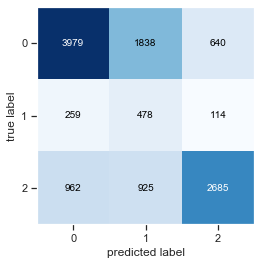

In [61]:
cm = confusion_matrix(y_test, y_score)
plot_confusion_matrix(cm)
plt.show()